In [ ]:
'''
1. RUN THE CELLS SEQUENTIALLY TO AVOID ANY IMPEDIMENTS
2. READ THE INSTRUCTIONS IN EACH CELL CAREFULLY
3. IN THE ABSENCE OF ANY INSTRUCTIONS, YOU MAY PROCEED TO RUN IT

This plot comprises the line plot for the β and α values corresponding to both paradigm-I and II
'''

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

plt.style.use(['science', 'no-latex'])

In [11]:
def load_res(save_loc):
    with open(save_loc, 'rb') as f:
        res = pickle.load(f)

    return res

def avg_across_dicts(dicts):
    """

    Args:
        dicts: list of dictionaries with same keys and lists as elements

    Returns:
        single dict with the keys and average of lists

    """
    avg_dict = dict()
    keys = dicts[0].keys()
    for k in keys:
        values = []
        for d in dicts:
            values.append(d[k])
        avg_dict[k] = np.mean(values, axis=0)

    return avg_dict

def str_contains(word_list, string):
    for word in word_list:
        if word not in string:
            return False
    
    return True

In [39]:
_alg_type = 'lwf' # naive / ewc / lwf
dtype = 'cifar_10' # mnist_5 / fmnist_5 / cifar_5 / mnist_10 / fmnist_10 / cifar_10

indicators, t1_indicators = None, None

if dtype == 'fmnist_5':
    indicators = ['mnist.FashionMNIST', 'classes.5', '-avg']
    t1_indicators = ['mnist.FashionMNIST', 'classes.5', '-t1']
elif dtype == 'fmnist_10':
    indicators = ['mnist.FashionMNIST', 'classes.10', '-avg']
    t1_indicators = ['mnist.FashionMNIST', 'classes.10', '-t1']
elif dtype == 'mnist_5':
    indicators = ['mnist.MNIST', 'classes.5', '-avg']
    t1_indicators = ['mnist.FashionMNIST', 'classes.5', '-t1']
elif dtype == 'mnist_10':
    indicators = ['mnist.MNIST', 'classes.10', '-avg']
    t1_indicators = ['mnist.FashionMNIST', 'classes.10', '-t1']
elif dtype == 'cifar_5':
    indicators = ['cifar.CIFAR10', 'classes.5', '-avg']
    t1_indicators = ['cifar.CIFAR10', 'classes.5', '-t1']
elif dtype == 'cifar_10':
    indicators = ['cifar.CIFAR10', 'classes.10', '-avg']
    t1_indicators = ['cifar.CIFAR10', 'classes.10', '-t1']
elif dtype == 'NovelNet':
    indicators = ['NovelNet', '-avg']
    t1_indicators = ['NovelNet', '-t1']

In [40]:
files = os.listdir()
result_dicts = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(indicators + [_alg_type], f)]
t1_dicts = [load_res(f) for f in files if f[-3:] == 'pkl' and str_contains(t1_indicators + [_alg_type], f)]
result_dict, t1_dict = avg_across_dicts(result_dicts), avg_across_dicts(t1_dicts)

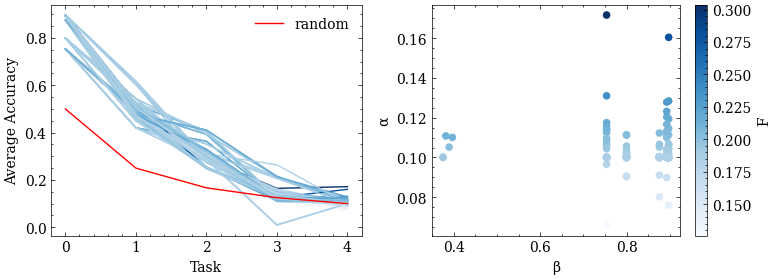

In [41]:
plt.figure(dpi=100, figsize=(8, 3))
f_var = [(2 * v[-1]) / ((v_t1[0] - v_t1[-1]) * v[-1] + 1) for v, v_t1 in zip(result_dict.values(), t1_dict.values())]

x = [i for i in range(5)]
y = [v for v in result_dict.values()]
norm = plt.Normalize(vmin=min(f_var), vmax=max(f_var))
plt.subplot(1, 2, 1)
plt.xlabel('Task'), plt.ylabel('Average Accuracy')
plt.xticks([0, 1, 2, 3, 4])
for idx, (_f, _y) in enumerate(zip(f_var, y)):
    plt.plot(x, _y, color=plt.cm.Blues(norm(_f)))
# for 5 classes setting
# rand = [1/(i + 1) for i in range(5)]
# for 10 classes setting
rand = [1/(i * 2) for i in range(1, 6)]
plt.plot(x, rand, color='r', label='random')
plt.legend(loc='upper right')

# x = [i+1 for i in range(4)]
# y = [v for v in result_dict.values()][:60]
# print(len(y))
# norm = plt.Normalize(vmin=min(f_var), vmax=max(f_var))
# plt.subplot(1, 2, 1)
# plt.xlabel('Task'), plt.ylabel('Average Accuracy')
# plt.xticks([1, 2, 3, 4, 5])
# for idx, (_f, _y) in enumerate(zip(f_var, y)):
#     plt.plot(x, _y, color=plt.cm.winter(norm(_f)))
# # rand = [1/((i + 1)) for i in range(5)]
# rand = [1/2, 1/3, 1/4, 1/5]
# plt.plot(x, rand, color='r', label='random')
# plt.legend(loc='upper right')

x = [v[0] - v[-1] for k,v in t1_dict.items()]
y = [v[-1] for k,v in result_dict.items()]
plt.subplot(1, 2, 2)
plt.xlabel('β'), plt.ylabel('α')
plt.scatter(x, y, c=f_var, s=20, cmap='Blues')

plt.colorbar(label='F')
plt.tight_layout()
plt.savefig('paper.fig.fscores.{}.{}.png'.format(_alg_type, dtype), dpi=100)